In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
from konlpy.tag import Okt
import matplotlib
import matplotlib.font_manager as fm

font_location = 'C:/Windows/Fonts/H2GPRM.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

driver = webdriver.Chrome()
url = "https://www.pa.go.kr/research/contents/speech/index.jsp"
driver.get(url)
time.sleep(3)
driver.find_element(By.XPATH, '//*[@id="speechEvent"]/option[8]').click()
driver.find_element(By.XPATH, '//*[@id="frm"]/fieldset[1]/div[2]/div[5]/button[2]').click()
time.sleep(3)
driver.find_element(By.XPATH, '//*[@id="m-items2"]/li[2]/a').click()
time.sleep(3)
pages = len(driver.find_elements(By.XPATH, '//*[@id="frm"]/nav[2]/ul/li'))
speechs = []
for i in range(3, pages - 1):
    trs = driver.find_elements(By.XPATH, '//*[@id="M_More"]/tr')
    for row in range(1, len(trs)+1):
        name = driver.find_element(By.XPATH, '//*[@id="M_More"]/tr['+str(row)+']/td[2]/a').text
        title = driver.find_element(By.XPATH, '//*[@id="M_More"]/tr['+str(row)+']/td[5]/a').text
        days = driver.find_element(By.XPATH, '//*[@id="M_More"]/tr['+str(row)+']/td[6]').text
        driver.find_element(By.XPATH, '//*[@id="M_More"]/tr['+str(row)+']/td[5]/a').click()
        time.sleep(2)
        contents = driver.find_element(By.XPATH, '//*[@id="content"]/div/table/tbody/tr[4]/td').text
        driver.back()
        temp = []
        temp.append(name)
        temp.append(title)
        temp.append(days)
        temp.append(contents)
        speechs.append(temp)
    try:
        driver.find_element(By.XPATH, '//*[@id="frm"]/nav[2]/ul/li[4]/a').click()
    except:
        continue
print('크롤링 완료')
driver.close()        

크롤링 완료


In [20]:
after_sp = []

for i in range(len(speechs)-1):
    if speechs[i][2][:4] == speechs[i+1][2][:4]:
        speechs[i]
    else:
        after_sp.append(speechs[i])
after_sp.append(speechs[len(speechs)-1])        

for row in after_sp:
    file = open('data_speech/' + row[0] + row[2][:4] + '.txt', 'w')
    file.write(row[3])
    file.close()
print('저장을 완료 했습니다.')    

저장을 완료 했습니다.


김대중(1103) ['국민', '우리', '그리고', '정부', '여러분', '없습니다', '반드시', '함께', '민주주의와', '정부는']
김영삼(714) ['우리', '국민', '여러분', '바로', '함께', '그러나', '그리고', '땅에', '대한', '없습니다']
노무현(806) ['우리', '국민', '동북아', '여러분', '위해', '나갈', '비롯한', '나가겠습니다', '세계의', '새로운']
노태우(1092) ['우리', '국민', '모든', '함께', '여러분', '어느', '새로운', '민족의', '국민이', '우리가']
문재인(479) ['대통령', '국민', '새로운', '우리', '여러분', '세상을', '만들겠습니다', '대한민국을', '나라를', '함께']
문재인(1356) ['우리', '국민', '코로나19', '정부는', '위기', '백신', '일자리', '경제', '함께', '특히']
박근혜(786) ['국민', '우리', '새로운', '시대를', '있도록', '함께', '희망의', '국민이', '여러분', '모두가']
박정희(891) ['우리', '정치적', '오늘', '그리고', '없는', '여기에', '국민', '모든', '민족의', '우리들의']
박정희(621) ['우리', '우리가', '나의', '친애하는', '여러분', '국민', '있어서', '위대한', '새로운', '일이며']
박정희(684) ['우리', '국민', '여러분', '나의', '모든', '통일', '국력을', '사랑하는', '세계', '시대의']
박정희(727) ['우리', '민족의', '국민', '그리고', '위대한', '더욱', '여러분', '위해', '위한', '나갈']
박정희(826) ['우리', '국민', '여러분', '민족', '새로운', '우리가', '이제', '세계', '나갈', '고도']
윤보선(398) ['국민', '새로운', '그리고', '경제적', '제2공화국의', '있어', '간단히', '말씀', '바라는', '같이']


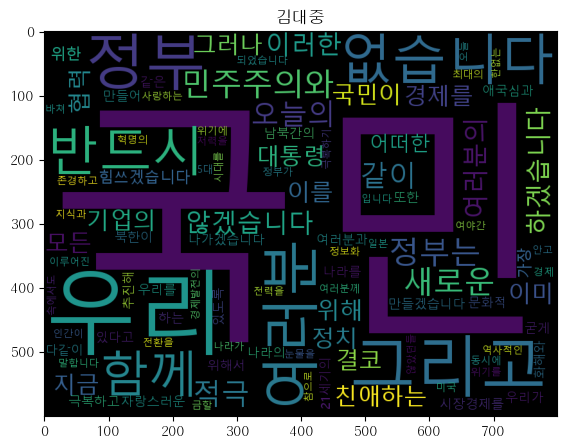

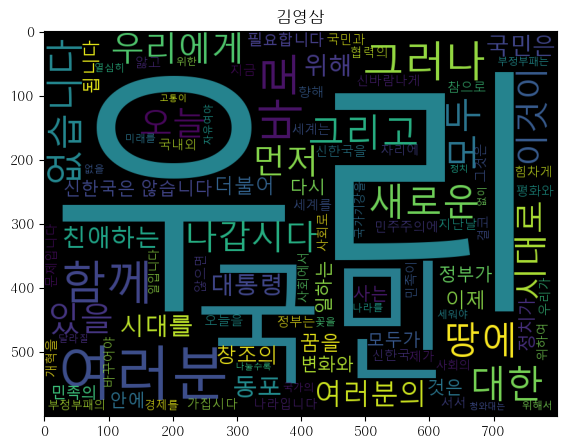

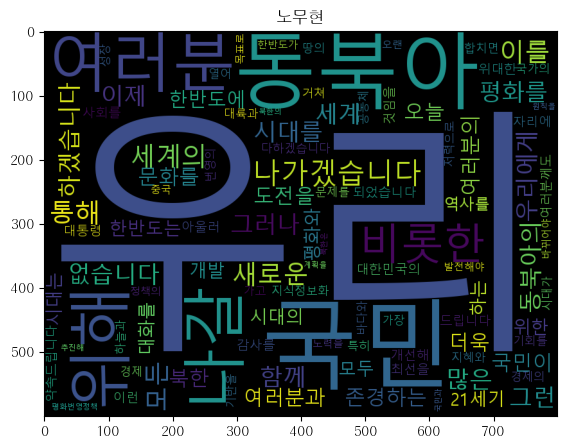

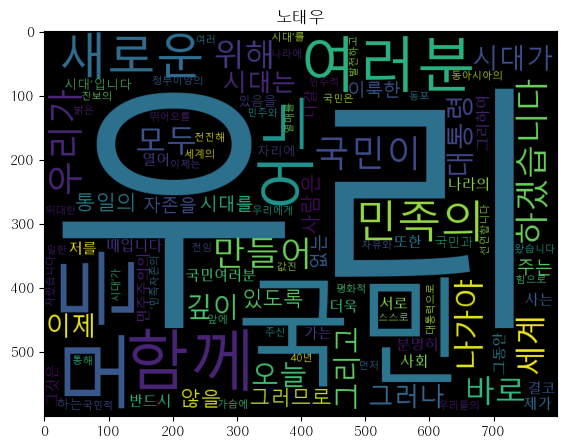

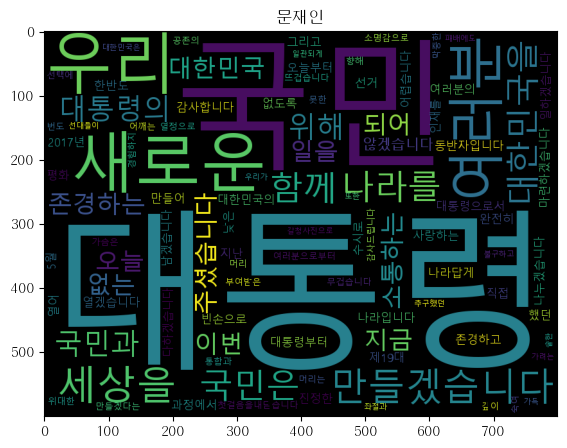

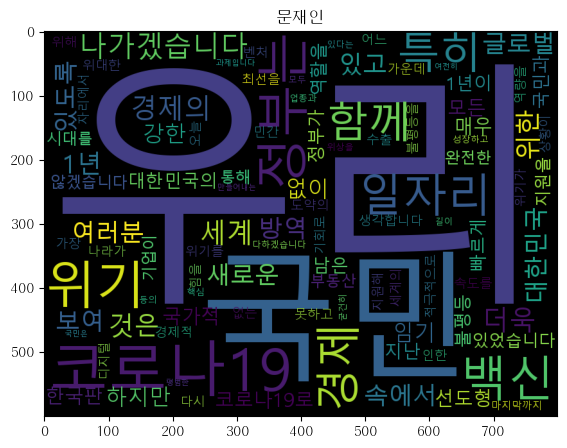

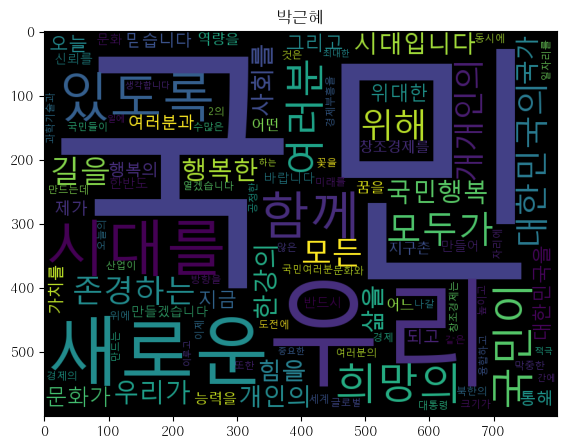

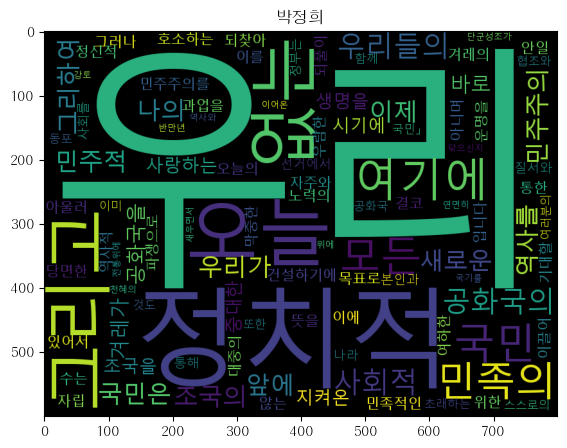

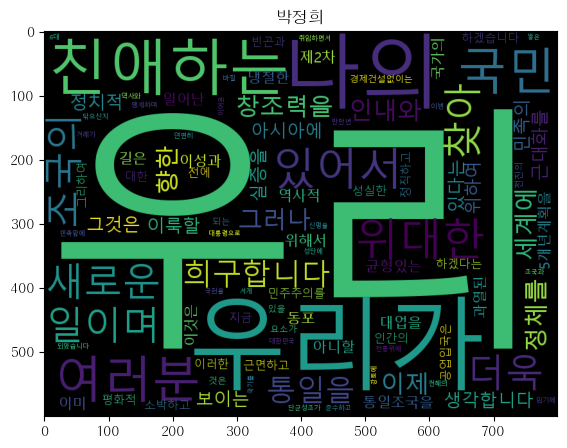

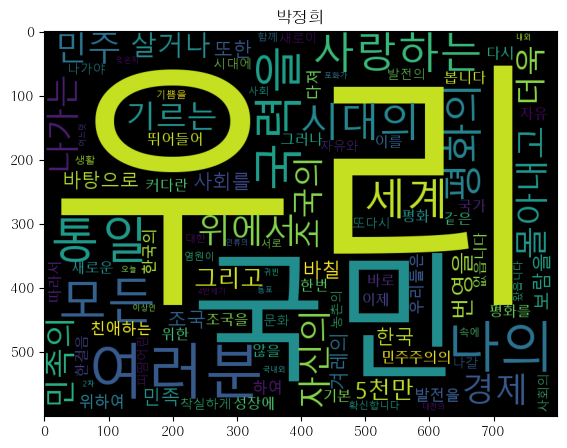

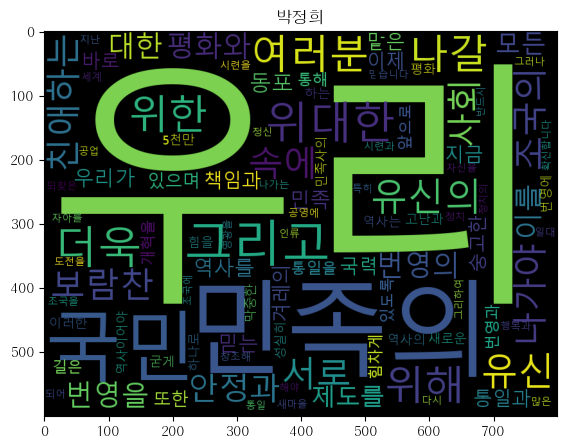

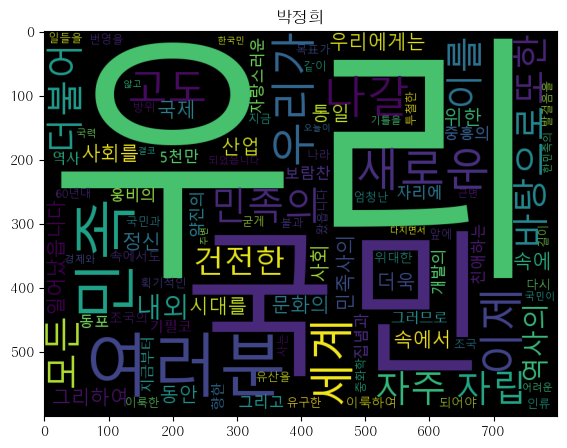

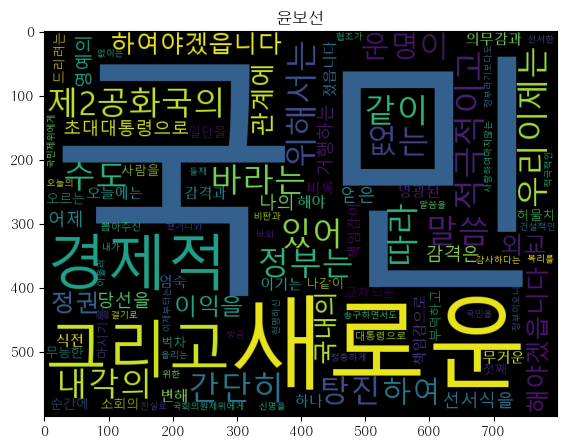

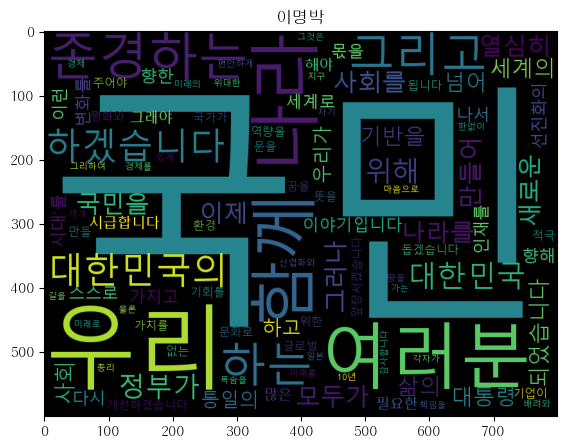

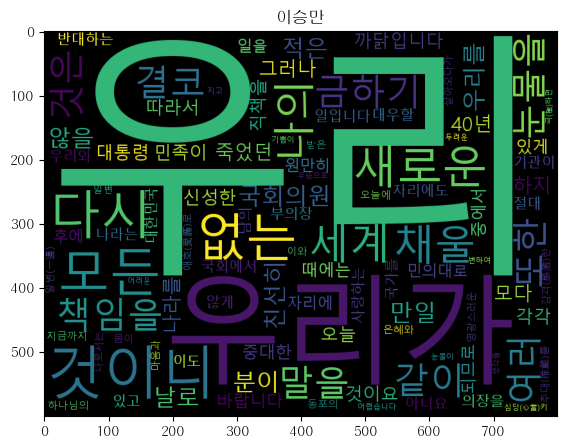

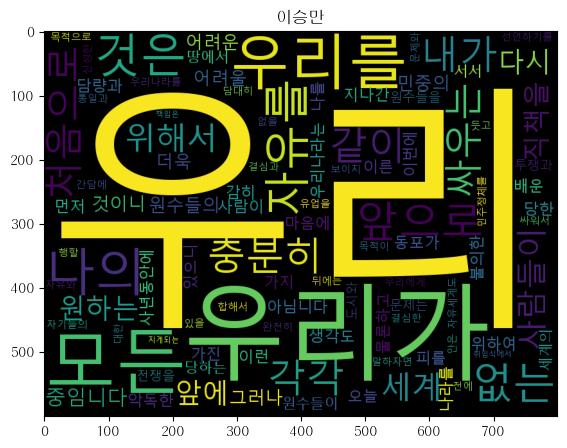

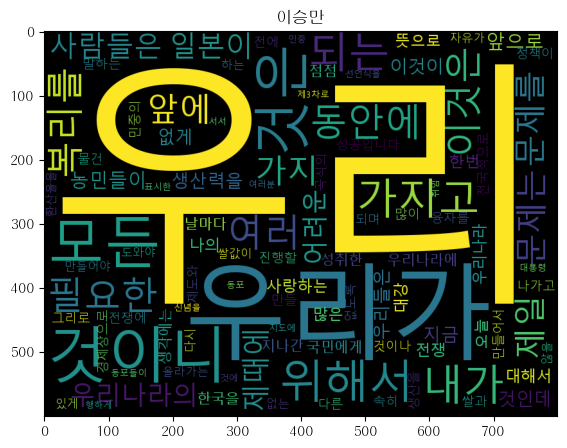

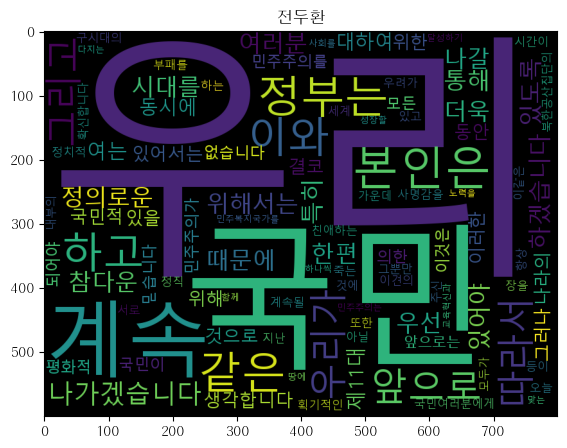

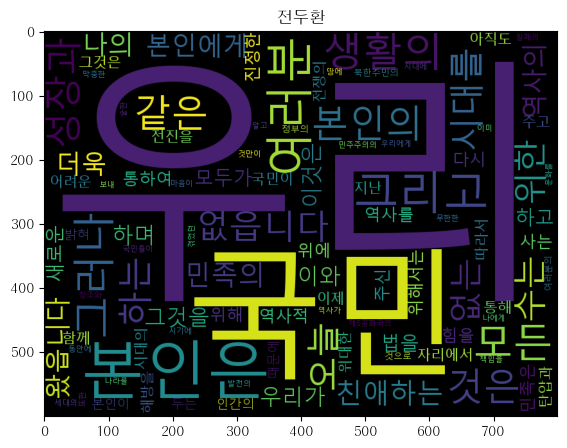

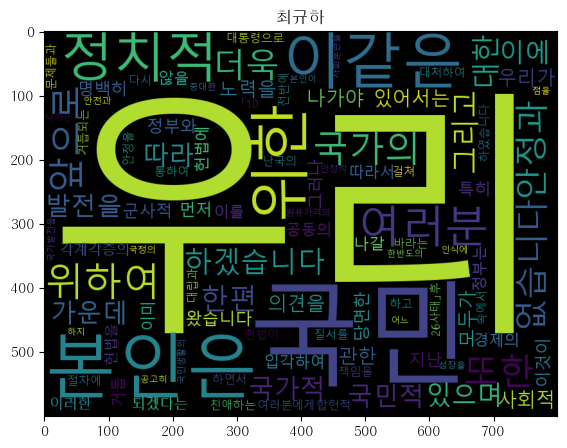

In [50]:
def show_wordcloud(words):
    words = Counter(words)
    word_100 = dict(words.most_common(100))
    wc = WordCloud(font_path = 'malgun', width=400, height= 300, scale=2.0,
               max_font_size=250)
    gen = wc.generate_from_frequencies(word_100)
    plt.figure(figsize=(10,5))
    plt.title(file[:3])
    plt.imshow(gen)
    word_count = Counter(words)
    word_10 = word_count.most_common(10)
    print(file[:3]+ '('+str(len(words))+')', [word[0] for word in word_10])
    
    
import os

file_lists = os.listdir('data_speech')
for file in file_lists:
    f = open('data_speech/'+file, 'r')
    conts = f.read()
    rep_word = [('\n', ' '),('.', ''),(',', ' '),('\'', ' '),('!', ' '),
               ('우리는', '우리'), ('우리의', '우리'), ('국민의', '국민'),
               ('대통령이', '대통령')]
    for key in rep_word:
        conts = conts.replace(key[0], key[1])
#     conts = conts.replace('\n', ' ')
#     conts = conts.replace('.', '')
#     conts = conts.replace(',', ' ')
#     conts = conts.replace('\'', ' ')
#     conts = conts.replace('!', ' ')
    
    words = conts.split(' ')
    del_word = ['있는', '저는', '있습니다','있읍니다', '합니다', '습니다', '씁니다',
               '것입니다', '되겠습니다', '하겠읍니다', '나는', '것을',
               '것이며', '것이', '아니라','바입니다', '것임니다']
    clean_word = []
    for word in words:
        if word not in del_word:
            clean_word.append(word)
    words = clean_word        
    words = [word for word in words if len(word) > 1 ]
    show_wordcloud(words)
    f.close()